# Student Activity: Portfolio Planner

## Part 2: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations

Harold has been asked to revisit the ten stocks that were researched in Part 1 of this activity.

Specifically, upper management wants Harold to go beyond just evaluating stocks by volatility/risk and create a more optimized portfolio with the following characteristics:

* Equal-weighted allocations

* Only non-correlated stocks

* Only positive return-to-risk ratio stocks (Sharpe ratios)

Then, they want to visualize the returns of a hypothetical 10,000 investment in such a constructed portfolio over time, as well as how such a portfolio compares to 10,000 investments in less optimized portfolios.

Use the Pandas library to help Harold construct an optimized portfolio of stocks, and then plot and compare the returns of a 10,000 investment in the portfolio over time to less optimized portfolios.

---

## Part 2: Portfolio Optimization via Correlation and Return-to-risk (sharpe ratio) Evaluations

### Instructions - Part 2

#### Import Libraries and Dependencies

In [23]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib import rcParams

%matplotlib inline

#### Read CSV as DataFrame

In [24]:
# Set the file path
combined_df_path = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\combined_df.csv")

# Read the CSV containing the combined DataFrame created in Part 1
# Set the `date` column as a datetime index to the DataFrame
combined_df = pd.read_csv(combined_df_path, index_col="date", infer_datetime_format=True, parse_dates=True)

# Display sample data
combined_df.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,43.29,77.955,77.955,34.35,24.06,53.110,53.710,35.78,87.73,58.5699
2015-06-25,42.85,76.390,76.390,34.49,24.02,52.610,54.070,36.18,85.95,57.2022
2015-06-26,42.98,75.250,75.250,34.32,19.66,54.855,54.620,36.12,84.45,57.2022
2015-06-29,41.79,75.160,75.160,33.18,18.73,53.835,53.550,35.77,81.96,56.1857
2015-06-30,41.97,75.380,75.380,33.09,18.84,54.010,53.615,35.52,78.42,56.2781


#### Calculate Daily Returns

In [25]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,-0.020076,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,-0.014923,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.001196,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,0.002927,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


#### Evaluate Correlation of Stock Returns

In [26]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = daily_returns.corr()
correlation

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
BK,1.000000,0.317462,0.317462,0.390731,0.339511,0.352312,0.361186,0.284662,0.373527,0.473280
FANG,0.317462,1.000000,1.000000,0.170001,0.258782,0.227929,0.211263,0.187070,0.260423,0.294045
JNJ,0.317462,1.000000,1.000000,0.170001,0.258782,0.227929,0.211263,0.187070,0.260423,0.294045
LUV,0.390731,0.170001,0.170001,1.000000,0.296751,0.285755,0.314467,0.220850,0.273768,0.294395
MU,0.339511,0.258782,0.258782,0.296751,1.000000,0.196334,0.247012,0.174143,0.609577,0.405658
NKE,0.352312,0.227929,0.227929,0.285755,0.196334,1.000000,0.398614,0.240217,0.242891,0.271221
SBUX,0.361186,0.211263,0.211263,0.314467,0.247012,0.398614,1.000000,0.238597,0.281220,0.303981
T,0.284662,0.187070,0.187070,0.220850,0.174143,0.240217,0.238597,1.000000,0.153232,0.281383
WDC,0.373527,0.260423,0.260423,0.273768,0.609577,0.242891,0.281220,0.153232,1.000000,0.397666
WRK,0.473280,0.294045,0.294045,0.294395,0.405658,0.271221,0.303981,0.281383,0.397666,1.000000


#### Use the `heatmap` function from the Seaborn library to visualize the correlation table

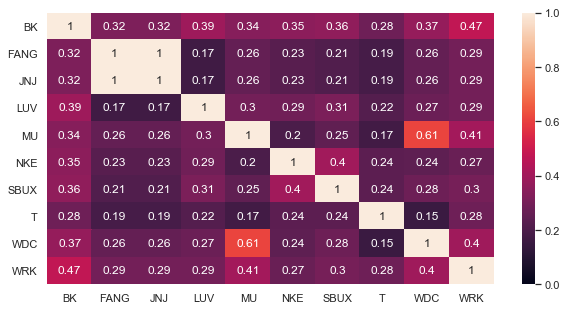

In [27]:
# Import the Seaborn library
import seaborn as sns

# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(correlation, vmin=0, vmax=1, annot=True)

In [28]:
daily_returns

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,-0.020076,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,-0.014923,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.001196,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,0.002927,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645
...,...,...,...,...,...,...,...,...,...,...
2019-05-14,-0.002969,0.017817,0.017817,0.011951,0.030230,0.013813,0.004956,0.020348,0.038148,0.029623
2019-05-15,-0.010636,-0.000458,-0.000458,0.006970,-0.002597,0.004064,0.009084,0.005146,0.019270,0.006722
2019-05-16,0.000645,0.014396,0.014396,0.011152,-0.028638,0.003214,0.014660,0.011840,-0.008793,-0.000534


#### Drop the Two Most Consistently Correlated Stocks

In [29]:
# Drop highly correlated stocks and keep only the non-correlated stocks
daily_returns_new = daily_returns.drop(['WRK', 'BK'], axis=1)
daily_returns_new

,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC
date,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.020076,-0.020076,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290
2015-06-26,-0.014923,-0.014923,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452
2015-06-29,-0.001196,-0.001196,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485
2015-06-30,0.002927,0.002927,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192
...,...,...,...,...,...,...,...,...
2019-05-14,0.017817,0.017817,0.011951,0.030230,0.013813,0.004956,0.020348,0.038148
2019-05-15,-0.000458,-0.000458,0.006970,-0.002597,0.004064,0.009084,0.005146,0.019270
2019-05-16,0.014396,0.014396,0.011152,-0.028638,0.003214,0.014660,0.011840,-0.008793


#### Evaluate Reward-to-Risk (Sharpe Ratio) of Non-Correlated Stocks

In [30]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratio = (daily_returns_new.mean() * 252) / (daily_returns_new.std() * np.sqrt(252))
sharpe_ratio.sort_values(ascending=False)

NKE     0.585923
SBUX    0.545402
LUV     0.520850
MU      0.435027
FANG    0.421292
JNJ     0.421292
T      -0.050216
WDC    -0.245731
dtype: float64

#### Drop the Three Lowest Sharpe Ratio Stocks

In [31]:
# Drop negative sharpe ratio stocks and keep only the postive sharpe ratio stocks. Display sample data
dropSharpeLows_df = daily_returns_new.drop(['T', 'WDC', 'FANG'], axis=1)
dropSharpeLows_df

,JNJ,LUV,MU,NKE,SBUX
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.020076,0.004076,-0.001663,-0.009414,0.006703
2015-06-26,-0.014923,-0.004929,-0.181515,0.042672,0.010172
2015-06-29,-0.001196,-0.033217,-0.047304,-0.018594,-0.019590
2015-06-30,0.002927,-0.002712,0.005873,0.003251,0.001214
...,...,...,...,...,...
2019-05-14,0.017817,0.011951,0.030230,0.013813,0.004956
2019-05-15,-0.000458,0.006970,-0.002597,0.004064,0.009084
2019-05-16,0.014396,0.011152,-0.028638,0.003214,0.014660


#### Evaluate Investment in Minimally-Correlated (Diversified) and Return-to-Risk (Sharpe Ratio) Optimized Portfolio

Set portfolio weights, calculate daily and cumulative portfolio returns, and plot $10,000 investment over time for optimized portfolio.

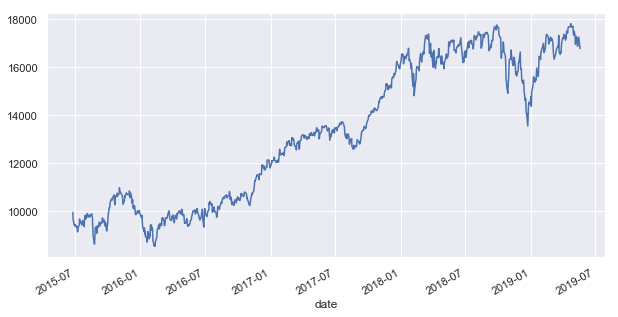

In [32]:
# Set initial investment
initial_investment = 10000

# Set weights
weights1 = [0.2, 0.2, 0.2, 0.2, 0.2]

# Use the `dot` function to multiply weights by each stock's daily returns to output the optimized portfolio's daily returns
portfolio_returns1 = dropSharpeLows_df.dot(weights1)

# Use the `cumprod` function to calculate the optimized portfolio's cumulative returns
cum_returns1 = (1 + portfolio_returns1).cumprod()

# Multiply the initial investment of $10,000 against the portfolio's series of cumulative returns
cum_profit1 = cum_returns1 * initial_investment
cum_profit1.plot()

#### Evaluate Investment in Non-Correlated (Diversified) Portfolio

Set portfolio weights, calculate daily and cumulative portfolio returns, and plot $10,000 investment over time for optimized portfolio.

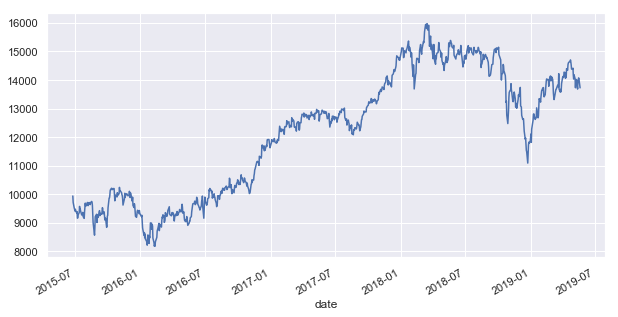

In [33]:
# Set initial investment
initial_investment = 10000

# Set weights
weights2 = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]

# Use the `dot` function to multiply weights by each stock's daily returns to output the non-correlated stock portfolio's daily returns
portfolio_returns2 = daily_returns_new.dot(weights2)

# Use the `cumprod` function to calculate the non-correlated stock portfolio's cumulative returns
cum_returns2 = (1 + portfolio_returns2).cumprod()

# Multiply the initial investment of `$10,000` against the portfolio's series of cumulative returns
cum_profit2 = initial_investment * cum_returns2
cum_profit2.plot()


#### Evaluate Investment in Original/Unoptimized Portfolio (No Modifications)

Set portfolio weights, calculate daily and cumulative portfolio returns, and plot $10,000 investment over time for optimized portfolio.

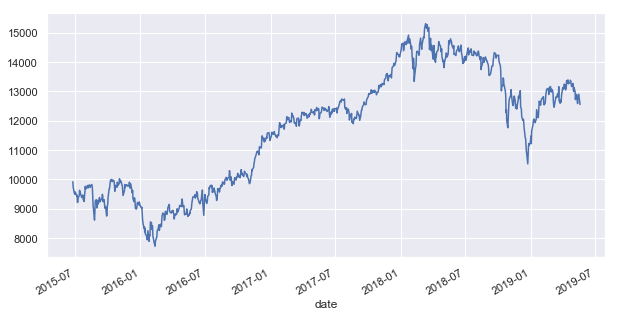

In [34]:
# Set initial investment
initial_investment = 10000

# Set weights
weights3 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Use the `dot` function to multiply weights by each stock's daily returns to output the unoptimized portfolio's daily returns
portfolio_returns3 = daily_returns.dot(weights3)

# Use the `cumprod` function to calculate the unoptimized stock portfolio's cumulative returns
cum_return3 = (1 + portfolio_returns3).cumprod()

# Multiply the initial investment of `$10,000` against the portfolio's series of cumulative returns
cum_profit3 = cum_return3 * initial_investment
cum_profit3.plot()

#### Plot Cumulative Profit from Part 1

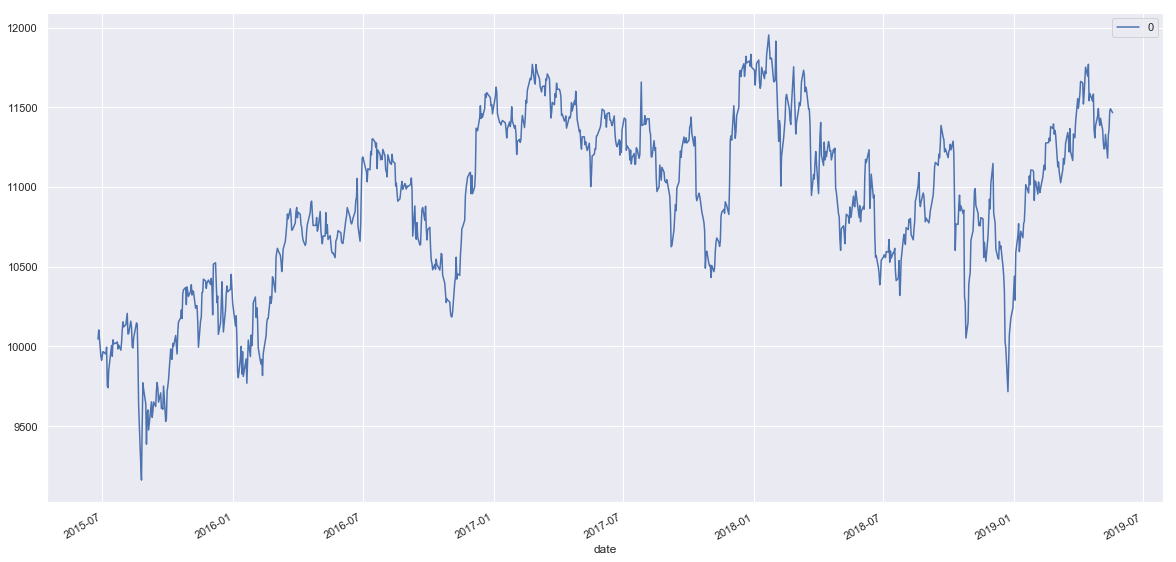

In [35]:
# Re-plot cumulative profit from Part 1 for use in the final overlay plot
# Read the returns information from the provided csv to do so
cumulative_profit_path = Path(r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\08-Stu_Portfolio_Planner\Resources\cumulative_profit.csv')
cumulative_profit = pd.read_csv(cumulative_profit_path, index_col="date", infer_datetime_format=True, parse_dates=True)

# Plot the returns of the investment
cumulative_profit.plot(figsize=(20,10))

### Overlay Hypothetical Portfolio Investments

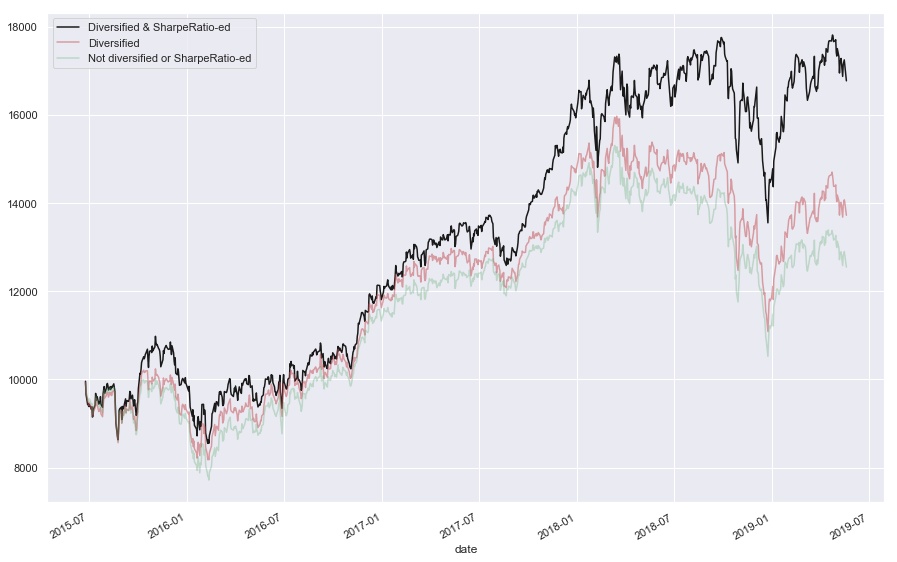

In [39]:
# Set the figure of the chart and plot each data trend on the single figure
plot1 = cum_profit1.plot(figsize=(15,10), color='k')
cum_profit2.plot(ax=plot1, color='r', alpha=0.5)
cum_profit3.plot(ax=plot1, color='g', alpha=0.3)

plot1.legend(['Diversified & SharpeRatio-ed', 'Diversified', 'Not diversified or SharpeRatio-ed'])